In [1]:
#
#
# RefCOCOg Adv Data Visualization
#
#

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, clear_output
import ipywidgets
from random import shuffle
import ipywidgets as widgets
import scipy
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib.patches as mpatches
import os.path as osp
import pickle
import json
import random

In [11]:
# set number of random samples to visualize
RANDOM_SAMPLES = 10

#set the folder where you extracted the Refcocog Adv dataset
#dataset folder structure is as follows:

# DATA_ROOT_FOLDER
#     |
#     ------> Images
#               |
#               ------> *.jpg
#     ------> refcocog_adv_annotations.json

DATA_ROOT_FOLDER = './'

refcocog_adv_annotations = json.load(open(os.path.join(DATA_ROOT_FOLDER, 'adv_easy_hard_annotations.json'), 'r'))


In [4]:
# Function to draw bounding boxes
def draw_bbox(ax, bbox,edge_color='red',  line_width=4, alpha=0.5, facecolor='red', text=""):
    """Draw one bounding box on a matplotlib axis object (ax)."""
    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt
    
    bbox_plot = mpatches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
        fill=False, edgecolor=facecolor, linewidth=line_width)
    ax.add_patch(bbox_plot)
    ax.text(bbox[0], bbox[1], text, color='white',verticalalignment='top',fontweight='bold',fontsize=18,bbox=dict(edgecolor='none', facecolor=facecolor, alpha=0.5))

{'annID': '327237', 'label': 'adv', 'gt_bbox': '1', 'bboxes': '{"1": [193.67, 136.99, 292.82, 195.21], "2": [134.19, 127.75, 169.47, 197.07], "3": [16.83, 133.64, 469.77, 195.86]}', 'expression': "the Nokia phone sitting atop another phone that rests upon a laptop's keyboard", 'img_file_name': 'COCO_train2014_000000553126.jpg'}
{'1': [193.67, 136.99, 292.82, 195.21], '2': [134.19, 127.75, 169.47, 197.07], '3': [16.83, 133.64, 469.77, 195.86]}

===================================***********************=========================================



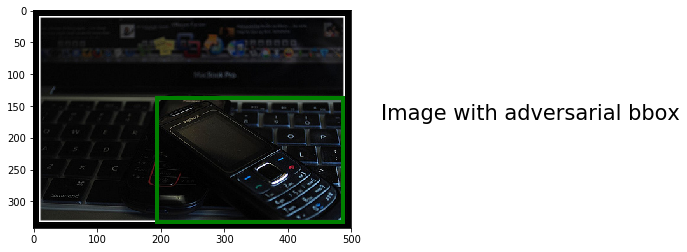

In [24]:
# load a sample adv expression
for ann in refcocog_adv_annotations['annotations']:
    if ann['label'] == 'adv':
        print(ann)
        bbox_candidates_map = json.loads(ann['bboxes'])
        print(bbox_candidates_map)
        print("\n===================================***********************=========================================\n")

        if os.path.exists(os.path.join(DATA_ROOT_FOLDER,"Images",ann['img_file_name'])):
            I = io.imread(os.path.join(DATA_ROOT_FOLDER,"Images",ann['img_file_name']))

            # Show original image 
            J = plt.figure()
            plt.imshow(I)
            ax=None
            if ax is None:
                ax = plt.gca()
            gt_bbox_map = bbox_candidates_map[ann['gt_bbox']]
            draw_bbox(ax, gt_bbox_map, facecolor='green')
            plt.imshow(I)
            plt.figtext(0.95, 0.5, "Image with adversarial bbox",fontsize=21)
            plt.show()
            plt.close()
        break